In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import keras_tuner as kt

In [6]:
df=pd.read_csv('data/SIATA/12.csv')

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
result=adfuller(df['pm25'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -24.826946
p-value: 0.000000


In [43]:
df.columns

Index(['Fecha_Hora', 'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr',
       'p_ssr', 'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'pm25_lag1',
       'pm25_lag12', 'pm25_lag24', 'no_lag1', 'no_lag12', 'no_lag24',
       'no2_lag1', 'no2_lag12', 'no2_lag24', 'nox_lag1', 'nox_lag12',
       'nox_lag24', 'dviento_ssr_lag1', 'dviento_ssr_lag12',
       'dviento_ssr_lag24', 'haire10_ssr_lag1', 'haire10_ssr_lag12',
       'haire10_ssr_lag24', 'p_ssr_lag1', 'p_ssr_lag12', 'p_ssr_lag24',
       'rglobal_ssr_lag1', 'rglobal_ssr_lag12', 'rglobal_ssr_lag24',
       'taire10_ssr_lag1', 'taire10_ssr_lag12', 'taire10_ssr_lag24',
       'vviento_ssr_lag1', 'vviento_ssr_lag12', 'vviento_ssr_lag24'],
      dtype='object')

In [44]:
features = [
    'no',
    'no2',
    'nox',
    'dviento_ssr',
    'haire10_ssr',
    'p_ssr',
    'rglobal_ssr',
    'taire10_ssr',
    'vviento_ssr'
    ]

In [45]:
df[features].describe()

,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr
count,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000,61368.000000
mean,15.852902,16.378801,31.093173,212.271839,63.358112,635.494887,148.834855,22.026101,0.808906
std,16.916051,9.207204,19.555127,120.928921,15.684614,1.280189,140.909611,3.421979,0.649064
min,0.000694,0.000900,0.007500,0.000000,10.400000,630.157000,0.002778,14.600000,0.000443
25%,3.799485,9.864325,16.713225,111.577500,51.700000,634.700000,70.855000,19.300000,0.300000
50%,9.713706,15.363600,26.545650,227.000000,66.900000,635.600000,108.797764,21.400000,0.663194
75%,22.354025,21.520900,41.030825,329.000000,76.295600,636.400000,158.660000,24.400000,1.100000
max,119.885000,70.855400,104.991000,360.000000,88.349900,639.400000,822.719000,33.400000,4.493070


In [46]:
df.dropna(inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61344 entries, 24 to 61367
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fecha_Hora         61344 non-null  object 
 1   pm25               61344 non-null  float64
 2   no                 61344 non-null  float64
 3   no2                61344 non-null  float64
 4   nox                61344 non-null  float64
 5   dviento_ssr        61344 non-null  float64
 6   haire10_ssr        61344 non-null  float64
 7   p_ssr              61344 non-null  float64
 8   rglobal_ssr        61344 non-null  float64
 9   taire10_ssr        61344 non-null  float64
 10  vviento_ssr        61344 non-null  float64
 11  pm25_lag1          61344 non-null  float64
 12  pm25_lag12         61344 non-null  float64
 13  pm25_lag24         61344 non-null  float64
 14  no_lag1            61344 non-null  float64
 15  no_lag12           61344 non-null  float64
 16  no_lag24           61344 n

In [48]:
df['pm25'].describe()

count    61344.000000
mean        20.628072
std          9.164789
min          0.500000
25%         14.000000
50%         20.000000
75%         27.000000
max         47.638028
Name: pm25, dtype: float64

In [49]:
# Extract the hour and the day of the week from the date
df['Fecha_Hora'] = pd.to_datetime(df['Fecha_Hora'])
df['hour'] = df['Fecha_Hora'].dt.hour
df['dayofweek'] = df['Fecha_Hora'].dt.dayofweek
df['month']=df['Fecha_Hora'].dt.month
df['year']=df['Fecha_Hora'].dt.year

In [50]:
df.drop(columns=['Fecha_Hora'], inplace=True)

# Variables numéricas

<Axes: >

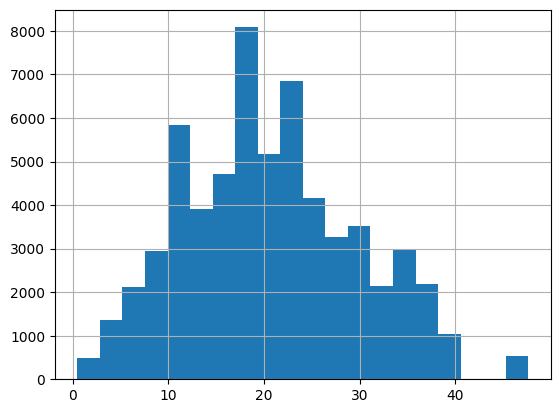

In [51]:
df['pm25'].hist(bins=20)

In [52]:
df['no'].describe()

count    61344.000000
mean        15.857095
std         16.917607
min          0.000694
25%          3.801325
50%          9.713706
75%         22.360675
max        119.885000
Name: no, dtype: float64

<Axes: >

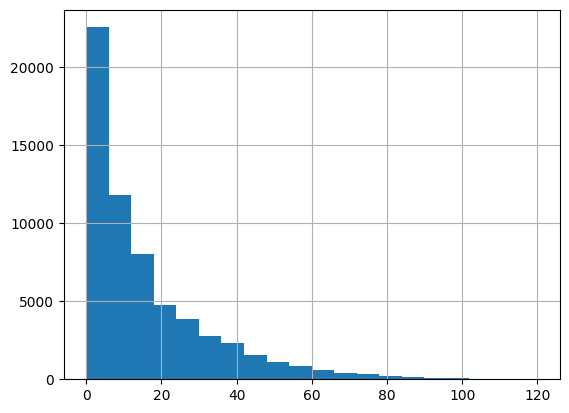

In [53]:
df['no'].hist(bins=20)

'pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr', 'p_ssr',
       'rglobal_ssr', 'taire10_ssr', 'vviento_ssr'

<Axes: >

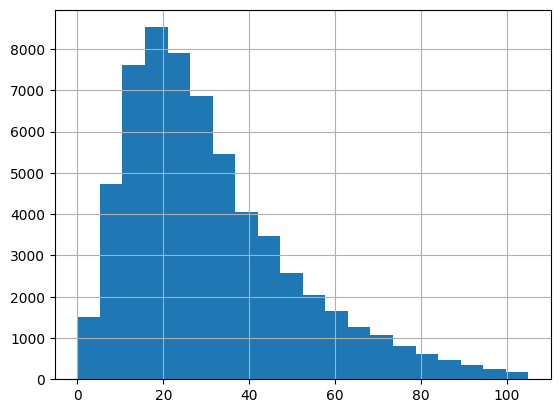

In [54]:
df['nox'].hist(bins=20)

In [55]:
#df['pm25_log']=np.log(df['pm25'])

In [56]:
#df['pm25_log'].hist(bins=20)

In [57]:
df['pm25'].describe()

count    61344.000000
mean        20.628072
std          9.164789
min          0.500000
25%         14.000000
50%         20.000000
75%         27.000000
max         47.638028
Name: pm25, dtype: float64

<Axes: xlabel='no2', ylabel='pm25'>

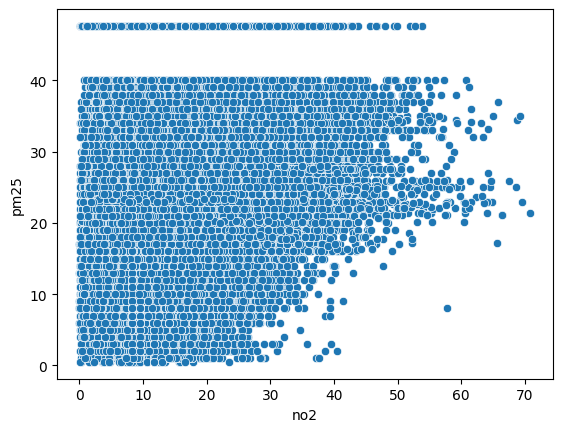

In [58]:
sns.scatterplot(data=df, y='pm25', x='no2')

# Particion de los datos

In [59]:
y=df['pm25']
X=df.drop(columns=['pm25'], axis=1)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X_train.columns)])

In [62]:
pipeline=Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])

In [63]:
param_grid = {
    # 'n_estimators': np.arange(10,210,10),
    'regressor__n_estimators': [120],
    'regressor__max_depth': [120],
    'regressor__min_samples_split': [2],
    # 'criterion': ['squared_error', 'absolute_error', 'friedman_mse']
    'regressor__criterion': ['squared_error']
}

In [64]:
# Verificar valores NaN
print("Valores NaN en X_train:\n", X_train.isna().sum())

# Verificar valores infinitos
print("¿Hay valores infinitos en X_train?", np.isinf(X_train).sum().sum())

Valores NaN en X_train:
 no                   0
no2                  0
nox                  0
dviento_ssr          0
haire10_ssr          0
p_ssr                0
rglobal_ssr          0
taire10_ssr          0
vviento_ssr          0
pm25_lag1            0
pm25_lag12           0
pm25_lag24           0
no_lag1              0
no_lag12             0
no_lag24             0
no2_lag1             0
no2_lag12            0
no2_lag24            0
nox_lag1             0
nox_lag12            0
nox_lag24            0
dviento_ssr_lag1     0
dviento_ssr_lag12    0
dviento_ssr_lag24    0
haire10_ssr_lag1     0
haire10_ssr_lag12    0
haire10_ssr_lag24    0
p_ssr_lag1           0
p_ssr_lag12          0
p_ssr_lag24          0
rglobal_ssr_lag1     0
rglobal_ssr_lag12    0
rglobal_ssr_lag24    0
taire10_ssr_lag1     0
taire10_ssr_lag12    0
taire10_ssr_lag24    0
vviento_ssr_lag1     0
vviento_ssr_lag12    0
vviento_ssr_lag24    0
hour                 0
dayofweek            0
month                0
year     

In [65]:
#Realizamos la busqueda de los hiperparametros
RF_gridSearch = GridSearchCV(
    pipeline, 
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error',  
    n_jobs=-1,
    verbose=2)
RF_gridSearch.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END regressor__criterion=squared_error, regressor__max_depth=120, regressor__min_samples_split=2, regressor__n_estimators=120; total time= 2.6min
[CV] END regressor__criterion=squared_error, regressor__max_depth=120, regressor__min_samples_split=2, regressor__n_estimators=120; total time= 3.0min
[CV] END regressor__criterion=squared_error, regressor__max_depth=120, regressor__min_samples_split=2, regressor__n_estimators=120; total time= 3.0min
[CV] END regressor__criterion=squared_error, regressor__max_depth=120, regressor__min_samples_split=2, regressor__n_estimators=120; total time= 3.1min
[CV] END regressor__criterion=squared_error, regressor__max_depth=120, regressor__min_samples_split=2, regressor__n_estimators=120; total time= 3.1min
[CV] END regressor__criterion=squared_error, regressor__max_depth=120, regressor__min_samples_split=2, regressor__n_estimators=120; total time= 3.1min
[CV] END regressor__criterion=squ

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         Index(['no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr', 'p_ssr',
       'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'pm25_lag1', 'pm25_lag12',
       'pm25_lag24', 'no_lag1', 'no_lag12', 'no_lag24', 'no2_lag1',
       'no2_lag12', 'no2_lag24', 'nox_lag1', 'nox_lag12', 'nox_...
       'taire10_ssr_lag12', 'taire10_ssr_lag24', 'vviento_ssr_lag1',
       'vviento_ssr_lag12', 'vviento_ssr_lag24', 'hour', 'dayofweek', 'month',
       'year'],
      dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__criterion': ['squared_error'],
                         'regressor__max_depth': [120],
                         'regressor__min_samples_split': [2],
                         'regressor__n_estimators': [120]},
             scoring='neg_mean_squared_error', verbose=2)

In [66]:
best_estimator = RF_gridSearch.best_estimator_

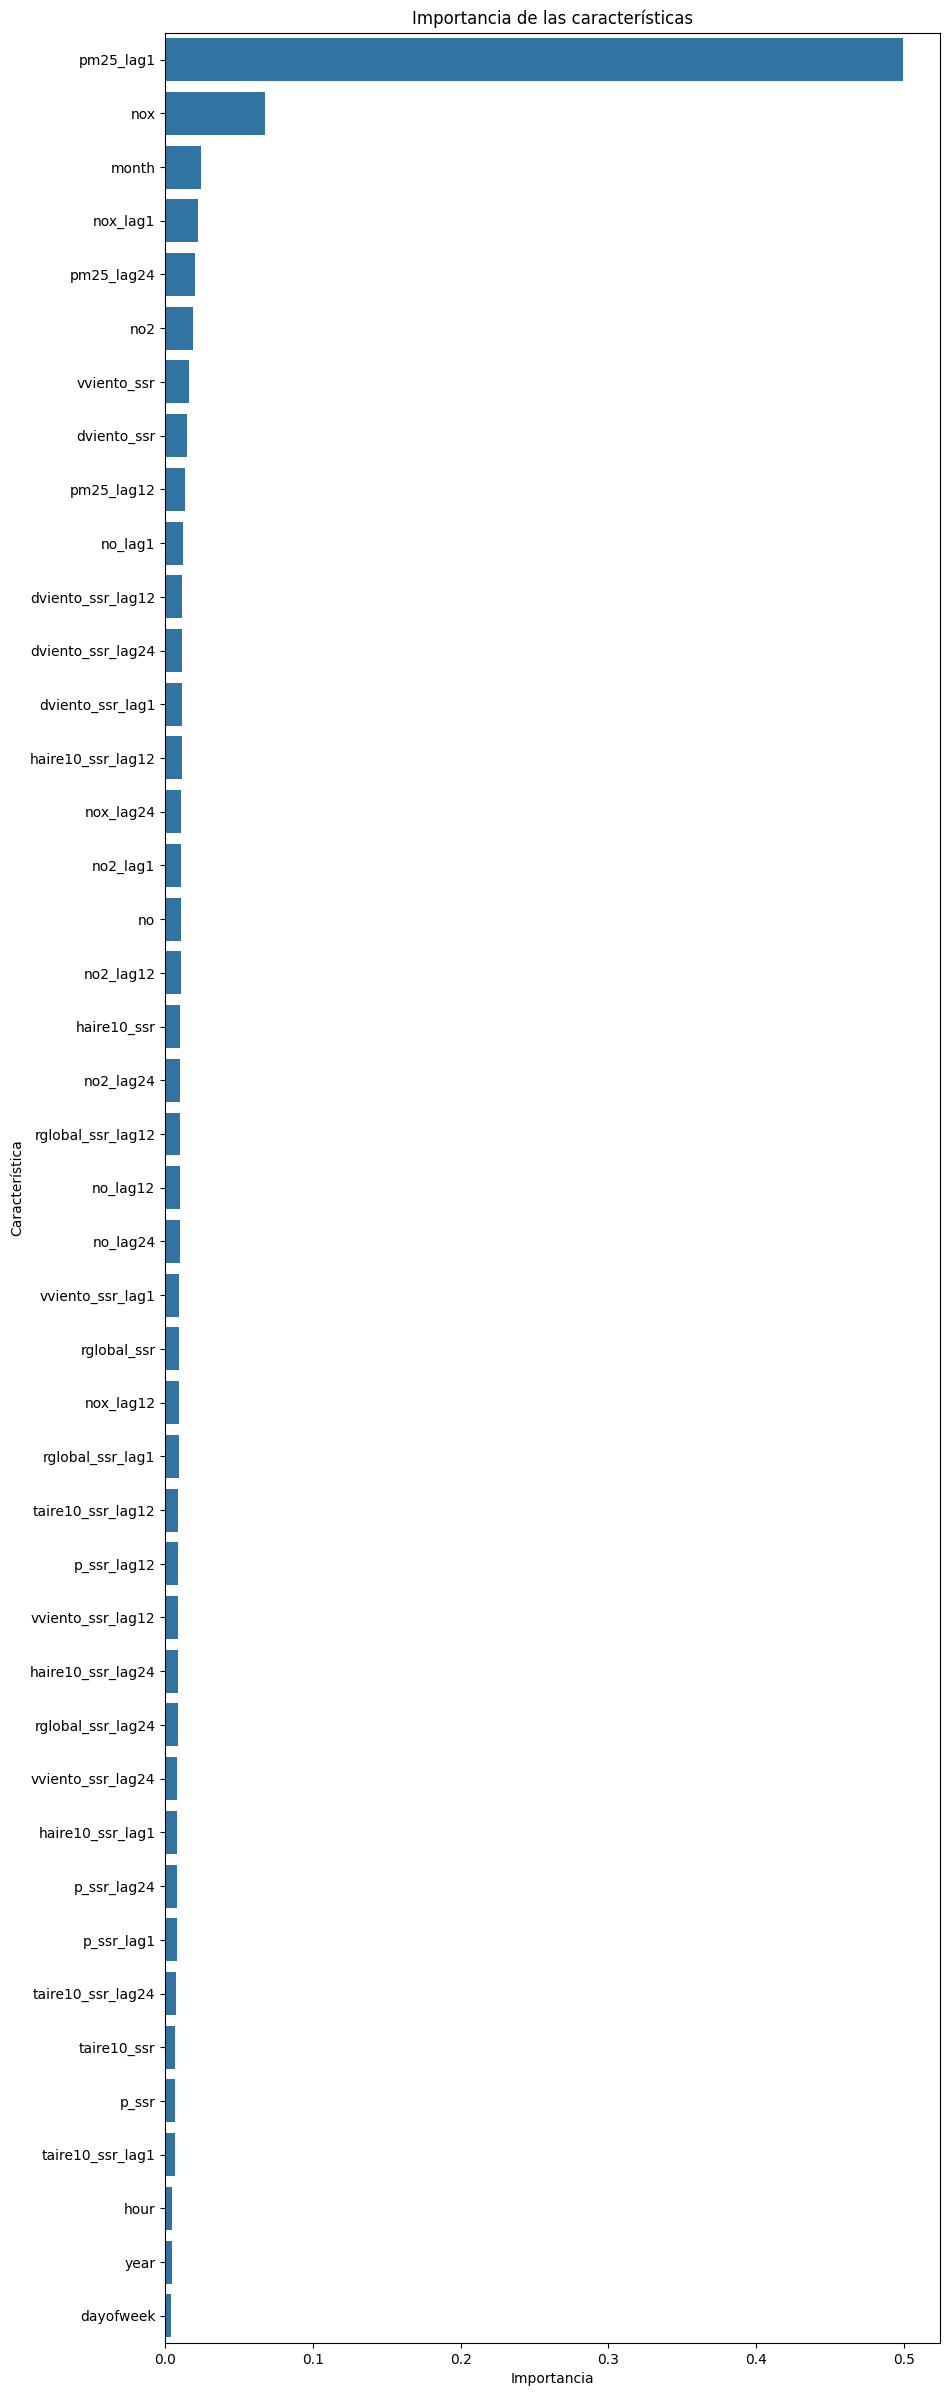

In [67]:
# Feature importance
importances = best_estimator.named_steps['regressor'].feature_importances_
# DataFrame con importancias
importances_df = pd.DataFrame(importances, index=X_train.columns, columns=['Importancia'])
# Ordenar importancias
importances_df = importances_df.sort_values(by='Importancia', ascending=False)
# Gráfico de barras
plt.figure(figsize=(10, 30))
sns.barplot(x='Importancia', y=importances_df.index, data=importances_df)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características')
plt.show()

In [68]:
importances_df.head(10)

,Importancia
pm25_lag1,0.499464
nox,0.067561
month,0.024043
nox_lag1,0.022517
pm25_lag24,0.020469
no2,0.018856
vviento_ssr,0.015847
dviento_ssr,0.014987
pm25_lag12,0.013510
no_lag1,0.012369


In [69]:
y_pred = best_estimator.predict(X_test)

In [70]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

MSE: 31.286316014341917
RMSE: 5.593417203672717
R2: 0.6296124256157272


((array([-3.74446109, -3.51556711, -3.38972502, ...,  3.38972502,
          3.51556711,  3.74446109]),
  array([-26.47519953, -23.2758152 , -22.13346818, ...,  23.35552112,
          23.72710074,  29.13469423])),
 (np.float64(5.576821712337663),
  np.float64(-0.07751614226686677),
  np.float64(0.9966756270257277)))

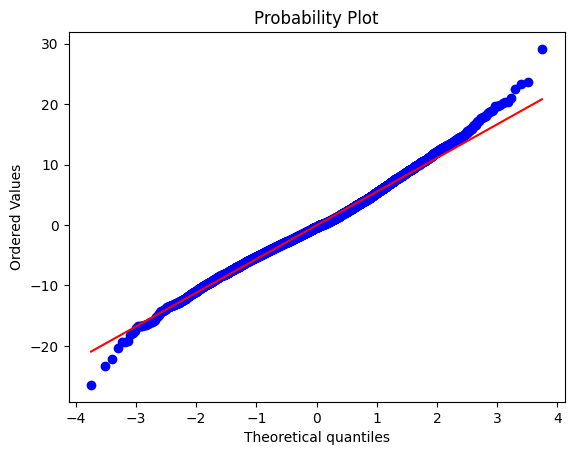

In [71]:
# Do the errors follow a normal distribution?
errors = y_test - y_pred
# Plot the QQ plot
stats.probplot(errors, dist="norm", plot=plt)

# Modelo MLP

In [72]:
# Apply manually the preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_val_preprocessed = preprocessor.transform(X_val)

In [73]:
X_train_preprocessed.shape

(46008, 43)

In [74]:
X_train.shape

(46008, 43)

In [75]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(90, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    return model

In [32]:
def model_builder(hp):
    # Se crea un modelo secuencial
    model = tf.keras.models.Sequential()
    # Se agrega una capa de entrada
    model.add(tf.keras.layers.InputLayer(input_shape=X_train_preprocessed.shape[1:]))
    # Se optimiza el número de capas ocultas
    n_layers = hp.Int('num_hidden_layers', min_value=2, max_value=6)
    # Optimize regularization parameters
    regularizer_choice = hp.Choice('regularizer', values=['none', 'l1', 'l2', 'l1_l2'])
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    
    # Get regularizer based on choice
    if regularizer_choice == 'l1':
        regularizer = tf.keras.regularizers.L1(hp.Float('l1_value', min_value=1e-4, max_value=1e-2))
    elif regularizer_choice == 'l2':
        regularizer = tf.keras.regularizers.L2(hp.Float('l2_value', min_value=1e-4, max_value=1e-2))
    elif regularizer_choice == 'l1_l2':
        regularizer = tf.keras.regularizers.L1L2(
            l1=hp.Float('l1_l1l2_value', min_value=1e-4, max_value=1e-2),
            l2=hp.Float('l2_l1l2_value', min_value=1e-4, max_value=1e-2)
        )
    else:
        regularizer = None
    # Se optimiza el número de neuronas por capa
    for i in range(n_layers):
        model.add(
            tf.keras.layers.Dense(
                units=hp.Int('units_' + str(i), min_value=10, max_value=100, step=10), 
                activation='relu',
                kernel_regularizer=regularizer
            )
        )
        if dropout_rate > 0.0:
            model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    # Se agrega la capa de salida
    model.add(tf.keras.layers.Dense(1))
    # Se optimiza el learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2])

    # Se compila el modelo
    model.compile(
        optimizer=tf.keras.optimizers.Adamax(learning_rate=hp_learning_rate),
        loss='mean_squared_error'
    )

    return model

In [76]:
print("X_train_preprocessed dtypes:", X_train_preprocessed.dtype)
print("y_train dtype:", y_train.dtype)
print("X_val dtypes:", X_val_preprocessed.dtype)
print("y_val dtype:", y_val.dtype)

X_train_preprocessed dtypes: float64
y_train dtype: float64
X_val dtypes: float64
y_val dtype: float64


In [77]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [78]:
model_adamax = create_model()
optim_adamax=tf.keras.optimizers.Adamax(learning_rate=0.01)
model_adamax.compile(loss='mean_squared_error', optimizer=optim_adamax)
history_adamax = model_adamax.fit(X_train_preprocessed, y_train, epochs=100, validation_data=(X_val_preprocessed, y_val), callbacks=[early_stopping_cb])

Epoch 1/100


/home/manuel/Documents/Maestria_Analitica/Semestre_II/Propuesta-de-TDG/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 57.5265 - val_loss: 36.1600
Epoch 2/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 35.2905 - val_loss: 33.7694
Epoch 3/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - loss: 33.9335 - val_loss: 35.7269
Epoch 4/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 33.5537 - val_loss: 33.0698
Epoch 5/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - loss: 33.2388 - val_loss: 33.5470
Epoch 6/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 32.6197 - val_loss: 33.2789
Epoch 7/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - loss: 32.7922 - val_loss: 32.1778
Epoch 8/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - loss: 32.0058 - val_loss: 32.8177
Epoch 9/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - loss: 31.9331 - val_loss: 32.0230
Epoch 10/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - loss: 32.4445 - val_loss: 32.8315
Epoch 11/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - loss: 32.4517 - val_los

In [79]:
model_adamax.evaluate(X_test_preprocessed, y_test)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 30.7449


30.63405418395996

In [80]:
# Calculate the predictions
y_pred_adamax = model_adamax.predict(X_test_preprocessed)
# Calculate the MSE
mse_adamax = mean_squared_error(y_test, y_pred_adamax)
print('MSE:', mse_adamax)
# Calculate the RMSE
rmse_adamax = np.sqrt(mse_adamax)
print('RMSE:', rmse_adamax)
# Calculate the R2
r2_adamax = r2_score(y_test, y_pred_adamax)
print('R2:', r2_adamax)

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MSE: 30.63404485894998
RMSE: 5.534803055118581
R2: 0.6373344319707003


In [38]:
# tuner=kt.RandomSearch(
#     model_builder,
#     objective='val_loss',
#     max_trials=3
# )
# Configure the tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_loss',
    max_epochs=100,
    factor=3,
    directory='mlp_tuning',
    project_name='pm25_mlp'
)

Reloading Tuner from mlp_tuning/pm25_mlp/tuner0.json


In [123]:
tuner.search(X_train_preprocessed, y_train, epochs=100, validation_data=(X_val_preprocessed, y_val), callbacks=[early_stopping_cb])

In [124]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
mlp_history=model.fit(X_train_preprocessed, y_train, epochs=100, validation_data=(X_val_preprocessed, y_val), callbacks=[early_stopping_cb])
model.evaluate(X_test_preprocessed, y_test)

Epoch 1/100


/home/manuel/Documents/Maestria_Analitica/Semestre_II/Propuesta-de-TDG/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1438/1438 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 52.8137 - val_loss: 33.3514
Epoch 2/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step - loss: 33.9607 - val_loss: 32.6573
Epoch 3/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - loss: 33.7098 - val_loss: 31.8975
Epoch 4/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - loss: 32.6066 - val_loss: 34.4422
Epoch 5/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - loss: 32.1927 - val_loss: 32.2452
Epoch 6/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - loss: 31.8732 - val_loss: 31.8437
Epoch 7/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - loss: 31.8521 - val_loss: 31.2946
Epoch 8/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - loss: 31.6474 - val_loss: 31.4059
Epoch 9/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - loss: 31.5121 - val_loss: 31.1667
Epoch 10/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - loss: 31.0511 - val_loss: 31.5473
Epoch 11/100
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 31.2811 - val_los

30.222156524658203

In [125]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 50)             │         4,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 90)             │         9,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,345 (220.10 KB)

 Trainable params: 18,781 (73.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,564 (146.74 KB)

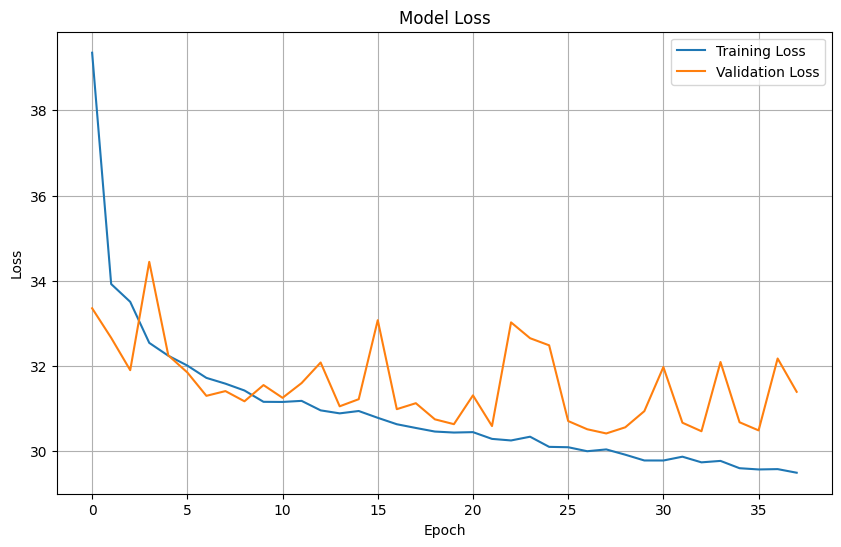

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 30.1049
Test Loss: 30.222156524658203
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error: 30.2222
Root Mean Squared Error: 5.4975
R² Score: 0.6422


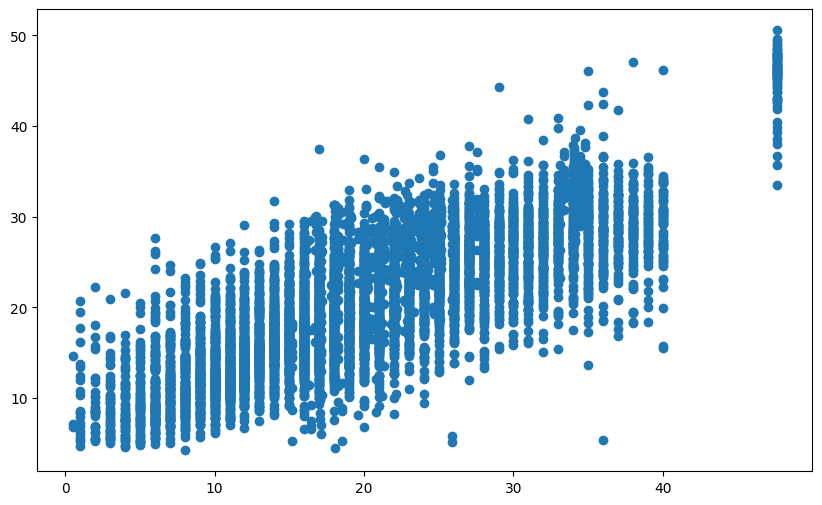

In [126]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test set
test_loss = model.evaluate(X_test_preprocessed, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred = model.predict(X_test_preprocessed)

# Calculate the MSE, RMSE, and R2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot the predictions vs. the true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)

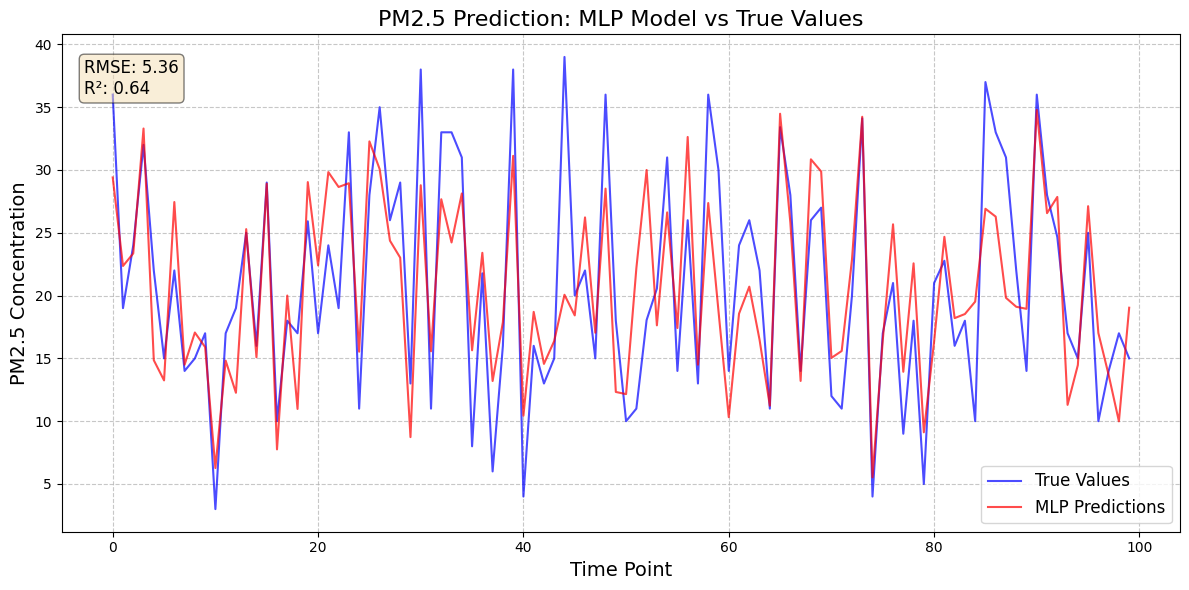

In [127]:
# Create a time series plot comparing predictions with true values
plt.figure(figsize=(12, 6))

y_test_plot=y_test[:100]
y_pred_plot=y_pred[:100]

# Create an index for the x-axis (representing time points)
time_index = range(len(y_test_plot))

# Plot true values
plt.plot(time_index, y_test_plot.values, 'b-', label='True Values', alpha=0.7)

# Plot predicted values
plt.plot(time_index, y_pred_plot, 'r-', label='MLP Predictions', alpha=0.7)

# Add a legend, title and labels
plt.title('PM2.5 Prediction: MLP Model vs True Values', fontsize=16)
plt.xlabel('Time Point', fontsize=14)
plt.ylabel('PM2.5 Concentration', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# If you want to zoom in on a specific time range (e.g., first 200 samples)
# Uncomment the following line:
# plt.xlim(0, 200)

# Add information about model performance
textstr = f'RMSE: {np.sqrt(mean_squared_error(y_test_plot, y_pred_plot)):.2f}\nR²: {r2_score(y_test_plot, y_pred_plot):.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.02, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# # You might also want to create a scatter plot to show the correlation
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test_plot, y_pred_plot, alpha=0.5)
# plt.plot([y_test_plot.min(), y_test_plot.max()], [y_test_plot.min(), y_test_plot.max()], 'k--', lw=2)
# plt.title('True vs Predicted Values', fontsize=16)
# plt.xlabel('True PM2.5 Values', fontsize=14)
# plt.ylabel('Predicted PM2.5 Values', fontsize=14)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

In [84]:
X_test_preprocessed

array([[0.39187119, 0.34966022, 0.68341308, ..., 0.02216017, 0.24474707,
        0.33378183],
       [0.30820302, 0.34007579, 0.58139717, ..., 0.11119493, 0.26700576,
        0.31152314],
       [0.06875967, 0.31558334, 0.29142777, ..., 0.02216017, 0.37829921,
        0.177971  ],
       ...,
       [0.45523728, 0.16276313, 0.62963316, ..., 0.13345362, 0.35604052,
        0.11119493],
       [0.32855181, 0.28187483, 0.56535406, ..., 0.20371561, 0.42281659,
        0.06667755],
       [0.14284777, 0.33060427, 0.38617276, ..., 0.04441886, 0.6231448 ,
        0.13345362]])

In [85]:
X_test

,no,no2,nox,dviento_ssr,haire10_ssr,p_ssr,rglobal_ssr,taire10_ssr,vviento_ssr,pm25_lag1,...,taire10_ssr_lag12,taire10_ssr_lag24,vviento_ssr_lag1,vviento_ssr_lag2,vviento_ssr_lag3,vviento_ssr_lag4,vviento_ssr_lag5,vviento_ssr_lag6,vviento_ssr_lag12,vviento_ssr_lag24
46027,46.9799,24.7759,71.7558,58.8,78.0,635.7,72.15358,19.7,0.724006,36.000000,...,24.7,20.8,0.100000,0.724006,0.200000,0.100000,0.500000,0.100000,1.1,1.500000
46028,36.9494,24.0968,61.0462,161.8,79.3,635.4,0.93000,19.5,0.200000,31.000000,...,26.1,20.0,0.724006,0.100000,0.724006,0.200000,0.100000,0.500000,1.2,1.400000
46029,8.2439,22.3614,30.6053,212.5,84.7,634.9,1.45000,18.5,0.100000,19.000000,...,25.6,19.6,0.200000,0.724006,0.100000,0.724006,0.200000,0.100000,1.7,0.800000
46030,1.6003,10.9179,12.5182,18.8,83.2,634.1,0.10000,18.6,0.100000,15.000000,...,25.7,19.4,0.100000,0.200000,0.724006,0.100000,0.724006,0.200000,0.5,0.600000
46031,1.6169,13.7217,15.3386,11.9,81.0,634.2,0.03000,18.6,0.200000,8.000000,...,26.0,18.6,0.100000,0.100000,0.200000,0.724006,0.100000,0.724006,0.7,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53690,41.4444,4.2801,45.7245,248.3,68.4,635.5,11.77000,20.2,0.100000,24.733045,...,27.6,19.3,0.915661,0.200000,0.915661,0.600000,1.700000,1.800000,0.6,0.915661
53691,56.4981,4.8332,61.3313,119.1,59.8,635.8,85.04000,22.8,0.400000,24.733045,...,26.9,21.9,0.100000,0.915661,0.200000,0.915661,0.600000,1.700000,0.9,0.100000
53692,54.5765,11.5334,66.1100,64.2,54.0,636.0,167.44000,24.3,0.100000,24.733045,...,25.3,24.0,0.400000,0.100000,0.915661,0.200000,0.915661,0.600000,1.6,0.500000
53693,39.3889,19.9730,59.3620,342.9,46.0,635.8,303.93000,26.2,1.000000,38.000000,...,24.1,26.3,0.100000,0.400000,0.100000,0.915661,0.200000,0.915661,1.9,0.300000


In [78]:
y_test_actual

0       31.000000
1       19.000000
2       15.000000
3        8.000000
4        5.000000
          ...    
7663    24.733045
7664    24.733045
7665    38.000000
7666    35.000000
7667    19.000000
Name: pm25, Length: 7668, dtype: float64

In [76]:
y_pred_actual

array([[27.63163 ],
       [26.988594],
       [19.699738],
       ...,
       [27.394855],
       [30.665142],
       [29.025326]], dtype=float32)

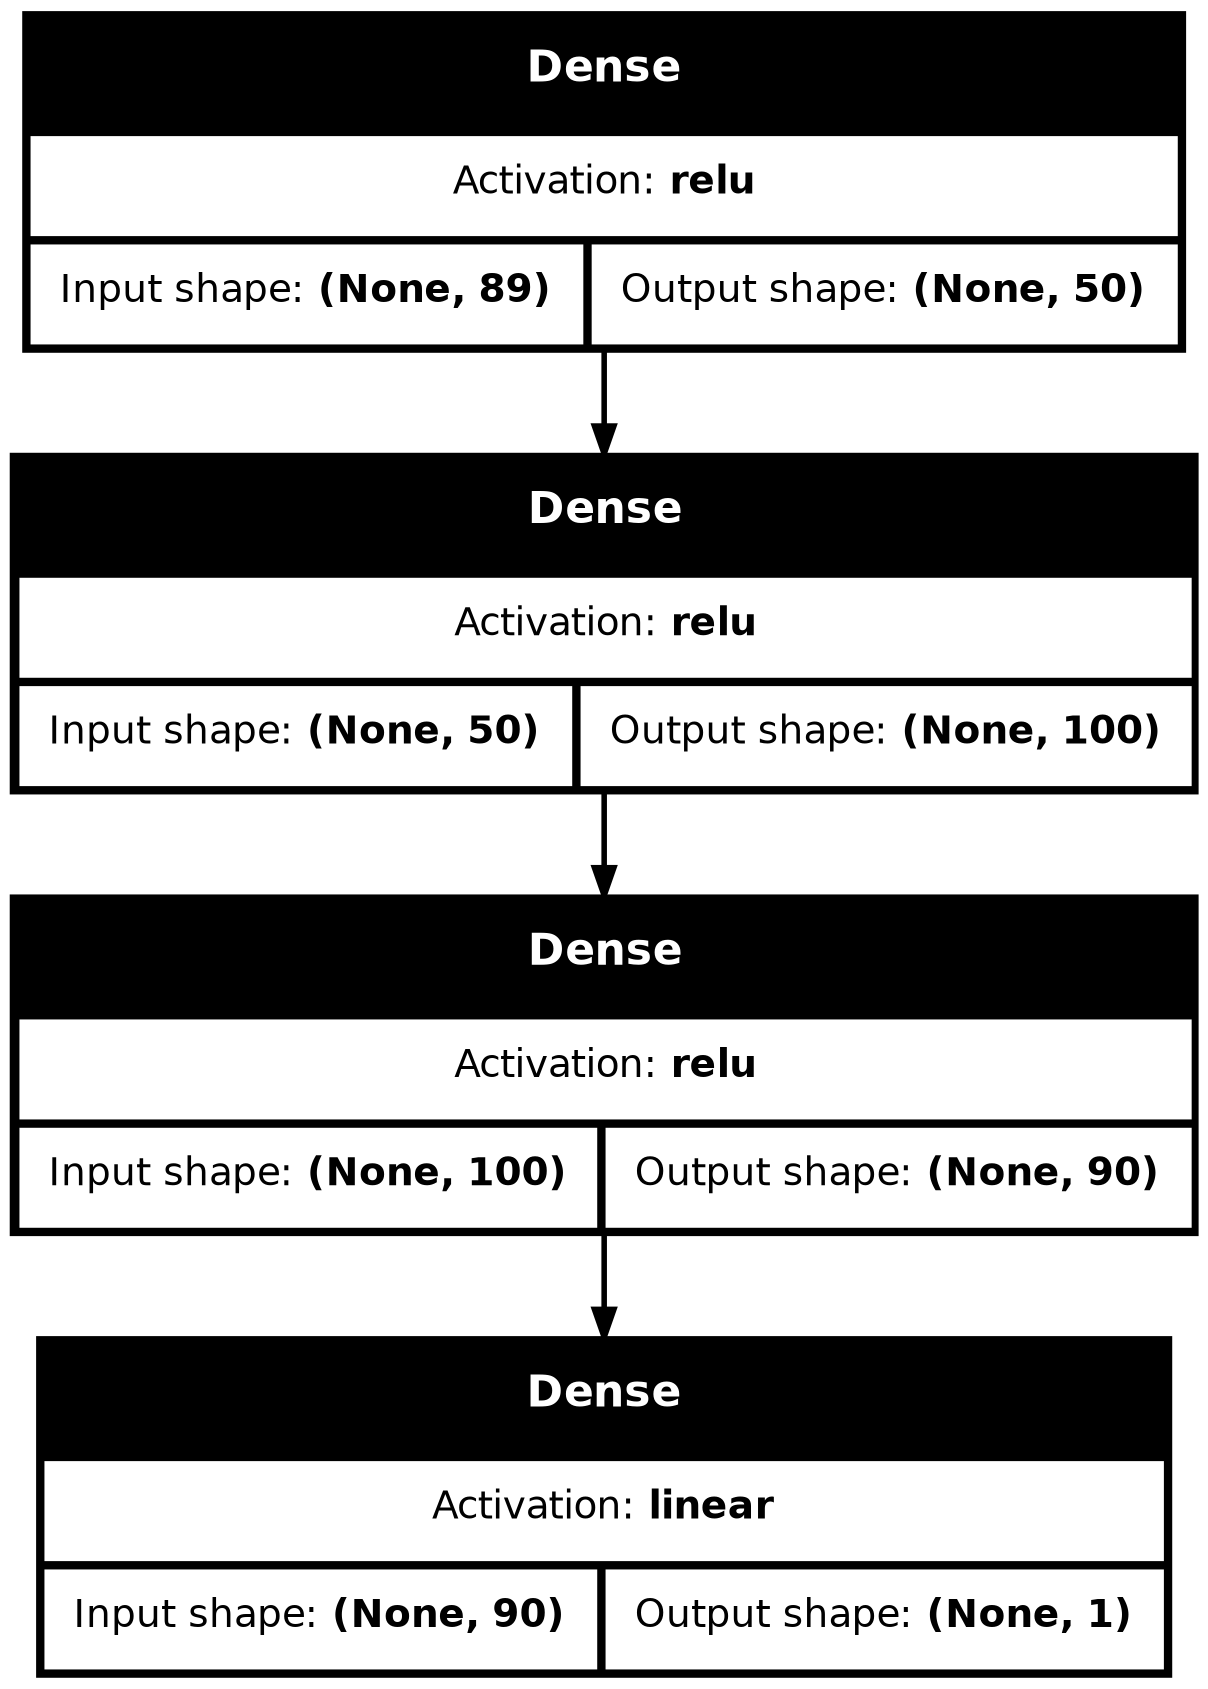

In [30]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [31]:
from keras_visualizer import visualizer

visualizer(model, view=True)

In [88]:
# Calculate the predictions and the MSE, RMSE and R2
y_pred_mlp = model.predict(X_test_preprocessed)
mse = mean_squared_error(y_test, y_pred_mlp)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)
r2 = r2_score(y_test, y_pred_mlp)
print('R2:', r2)

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
MSE: 36.429340046674476
RMSE: 6.035672294506592
R2: 0.48395431125937616


In [53]:
y_pred_mlp.shape

(7668, 1)

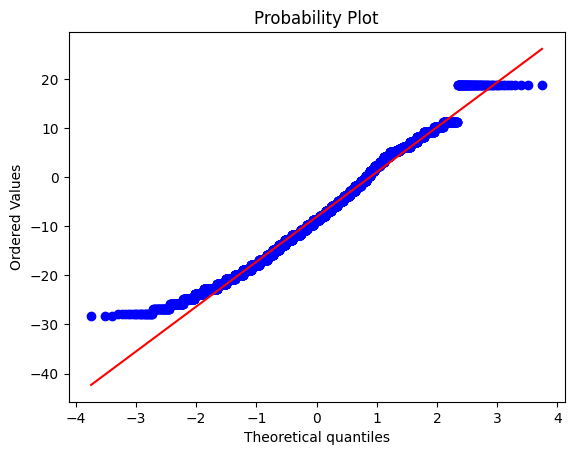

In [54]:
# Plot the QQ plot
errors = y_test - y_pred[0]
stats.probplot(errors, dist="norm", plot=plt)
plt.show()

In [131]:
# Theil's U to compare the MLP with the naive forecast
def theils_u(y_true, y_pred, y_naive):
    mse_pred = mean_squared_error(y_true, y_pred)
    mse_naive = mean_squared_error(y_true, y_naive)
    u = np.sqrt(mse_pred / mse_naive)
    return u

# Calculate the naive forecast
y_naive = np.roll(y_test, 1)

# Calculate Theil's U
u = theils_u(y_test, y_pred_mlp, y_naive)
print('Theil\'s U:', u)

Theil's U: 0.8902204294927254


In [130]:
y_test

3267     36.0
6766     19.0
37236    24.0
18492    32.0
48531    22.0
         ... 
9779     29.0
55932    12.0
10964    23.0
57977    15.0
21121    17.0
Name: pm25, Length: 7668, dtype: float64

# 3. Modelo LSTM

In [32]:
def create_multivariate_sequences(data, target_col_idx, seq_length):
    """
    Create sequences from multivariate time series data
    
    Parameters:
    -----------
    data : numpy.ndarray
        Multivariate time series data with shape (n_samples, n_features)
    target_col_idx : int
        Index of the target column (PM2.5) in the data
    seq_length : int
        Length of the sequences to create (lookback window)
        
    Returns:
    --------
    tuple
        (X, y) where X has shape (n_samples, seq_length, n_features)
        and y has shape (n_samples, 1)
    """
    X, y = [], []
    for i in range(len(data) - seq_length):
        # Include all features for X
        X.append(data[i:i + seq_length, :])
        # Only predict the target variable (PM2.5)
        y.append(data[i + seq_length, target_col_idx:target_col_idx+1])
    return np.array(X), np.array(y)

In [33]:
df.columns

Index(['pm25', 'no', 'no2', 'nox', 'dviento_ssr', 'haire10_ssr', 'p_ssr',
       'rglobal_ssr', 'taire10_ssr', 'vviento_ssr', 'pm25_lag1', 'pm25_lag2',
       'pm25_lag3', 'pm25_lag4', 'pm25_lag5', 'pm25_lag6', 'pm25_lag12',
       'pm25_lag24', 'no_lag1', 'no_lag2', 'no_lag3', 'no_lag4', 'no_lag5',
       'no_lag6', 'no_lag12', 'no_lag24', 'no2_lag1', 'no2_lag2', 'no2_lag3',
       'no2_lag4', 'no2_lag5', 'no2_lag6', 'no2_lag12', 'no2_lag24',
       'nox_lag1', 'nox_lag2', 'nox_lag3', 'nox_lag4', 'nox_lag5', 'nox_lag6',
       'nox_lag12', 'nox_lag24', 'dviento_ssr_lag1', 'dviento_ssr_lag2',
       'dviento_ssr_lag3', 'dviento_ssr_lag4', 'dviento_ssr_lag5',
       'dviento_ssr_lag6', 'dviento_ssr_lag12', 'dviento_ssr_lag24',
       'haire10_ssr_lag1', 'haire10_ssr_lag2', 'haire10_ssr_lag3',
       'haire10_ssr_lag4', 'haire10_ssr_lag5', 'haire10_ssr_lag6',
       'haire10_ssr_lag12', 'haire10_ssr_lag24', 'p_ssr_lag1', 'p_ssr_lag2',
       'p_ssr_lag3', 'p_ssr_lag4', 'p_ssr_lag5', 'p_s

In [34]:
# Select features to use
features = [
    'pm25',
    'no',
    'no2',
    'nox',
    'dviento_ssr',
    'haire10_ssr',
    'p_ssr',
    'rglobal_ssr',
    'taire10_ssr',
    'vviento_ssr'
    ]  # Adjust based on your available data
data = df[features].values

In [35]:
data[0]

array([1.90000000e+01, 2.56556000e+00, 1.08821000e+01, 1.34436000e+01,
       2.78566000e+02, 7.86471000e+01, 6.37563000e+02, 1.37472039e+02,
       1.78553000e+01, 1.72479000e-01])

In [42]:
# Normalize all features
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences with a window of 24 hours (for looking at previous 24h)
seq_length = 6
pm25_idx = 0  # Index of PM2.5 in your features list
X_lstm, y_lstm = create_multivariate_sequences(data_scaled, pm25_idx, seq_length)

# Split into train, validation, and test sets
X_train_lstm, X_temp_lstm, y_train_lstm, y_temp_lstm = train_test_split(X_lstm, y_lstm, test_size=0.25, random_state=42)
X_val_lstm, X_test_lstm, y_val_lstm, y_test_lstm = train_test_split(X_temp_lstm, y_temp_lstm, test_size=0.5, random_state=42)

# Report data shapes
print(f"X_train shape: {X_train_lstm.shape}")  # Should be (n_samples, seq_length, n_features)
print(f"y_train shape: {y_train_lstm.shape}")  # Should be (n_samples, 1)

X_train shape: (46003, 6, 10)
y_train shape: (46003, 1)


In [43]:
data_scaled.shape

(61344, 10)

In [44]:
data_scaled

array([[0.39246444, 0.02139451, 0.15357105, ..., 0.16709195, 0.17315426,
        0.03829305],
       [0.2015358 , 0.03731611, 0.1545477 , ..., 0.16709195, 0.14137766,
        0.06221357],
       [0.24396438, 0.02437421, 0.13370188, ..., 0.16709195, 0.13204787,
        0.07347291],
       ...,
       [0.32882156, 0.03642433, 0.07641716, ..., 0.0864577 , 0.30851064,
        0.28926445],
       [0.49853591, 0.03076721, 0.06272149, ..., 0.0864577 , 0.29255319,
        0.177971  ],
       [0.49853591, 0.0290664 , 0.0538385 , ..., 0.0864577 , 0.28723404,
        0.22248838]])

In [45]:
X_lstm

array([[[0.39246444, 0.02139451, 0.15357105, ..., 0.16709195,
         0.17315426, 0.03829305],
        [0.2015358 , 0.03731611, 0.1545477 , ..., 0.16709195,
         0.14137766, 0.06221357],
        [0.24396438, 0.02437421, 0.13370188, ..., 0.16709195,
         0.13204787, 0.07347291],
        [0.15910721, 0.02327015, 0.10693576, ..., 0.16709195,
         0.12636702, 0.11142687],
        [0.11667862, 0.04761879, 0.1175286 , ..., 0.16709195,
         0.12244681, 0.02958834],
        [0.15910721, 0.04498667, 0.10681227, ..., 0.16709195,
         0.11557447, 0.00782723]],

       [[0.2015358 , 0.03731611, 0.1545477 , ..., 0.16709195,
         0.14137766, 0.06221357],
        [0.24396438, 0.02437421, 0.13370188, ..., 0.16709195,
         0.13204787, 0.07347291],
        [0.15910721, 0.02327015, 0.10693576, ..., 0.16709195,
         0.12636702, 0.11142687],
        [0.11667862, 0.04761879, 0.1175286 , ..., 0.16709195,
         0.12244681, 0.02958834],
        [0.15910721, 0.04498667, 0.106

In [46]:
# Define model architecture
def build_multivariate_lstm_model(seq_length, n_features, lstm_units=50, dropout_rate=0.2):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units=lstm_units, return_sequences=True, 
                  input_shape=(seq_length, n_features)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.LSTM(units=lstm_units))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(units=1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def build_bidirectional_lstm_model(seq_length, n_features):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True), 
                          input_shape=(seq_length, n_features)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)))
    model.add(tf.keras.layers.Dense(16, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
        loss='mean_squared_error')
    return model

# Get the number of features
n_features = X_train_lstm.shape[2]

# Create and compile the model
# lstm_model = build_multivariate_lstm_model(seq_length, n_features)
lstm_model = build_bidirectional_lstm_model(seq_length, n_features)
lstm_model.summary()

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
lstm_history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    epochs=60,
    batch_size=32,
    validation_data=(X_val_lstm, y_val_lstm),
    callbacks=[early_stopping],
    verbose=1
)

/home/manuel/Documents/Maestria_Analitica/Semestre_II/Propuesta-de-TDG/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 6, 64)          │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 6, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,177 (86.63 KB)

 Trainable params: 22,049 (86.13 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0303 - val_loss: 0.0173
Epoch 2/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0191 - val_loss: 0.0183
Epoch 3/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0176 - val_loss: 0.0162
Epoch 4/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0174 - val_loss: 0.0164
Epoch 5/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0171 - val_loss: 0.0161
Epoch 6/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0169 - val_loss: 0.0163
Epoch 7/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0165 - val_loss: 0.0162
Epoch 8/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0169 - val_loss: 0.0156
Epoch 9/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0166 - val_loss: 0.0158
Epoch 10/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0165 - val_loss: 0.0166
Epoch 11/60
1438/1438 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0165 - val_loss: 0.0159
Epoch 12/60
1438/1438 ━━━━━━━

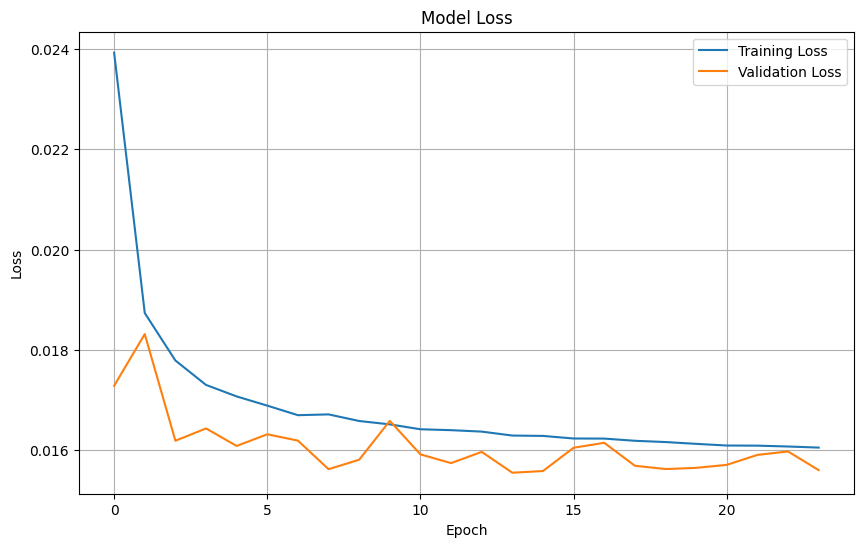

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160
Test Loss: 0.016409248113632202
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 0.0164
Root Mean Squared Error: 0.1281
R² Score: 0.5655
Mean Squared Error: 36.4613
Root Mean Squared Error: 6.0383
R² Score: 0.5655


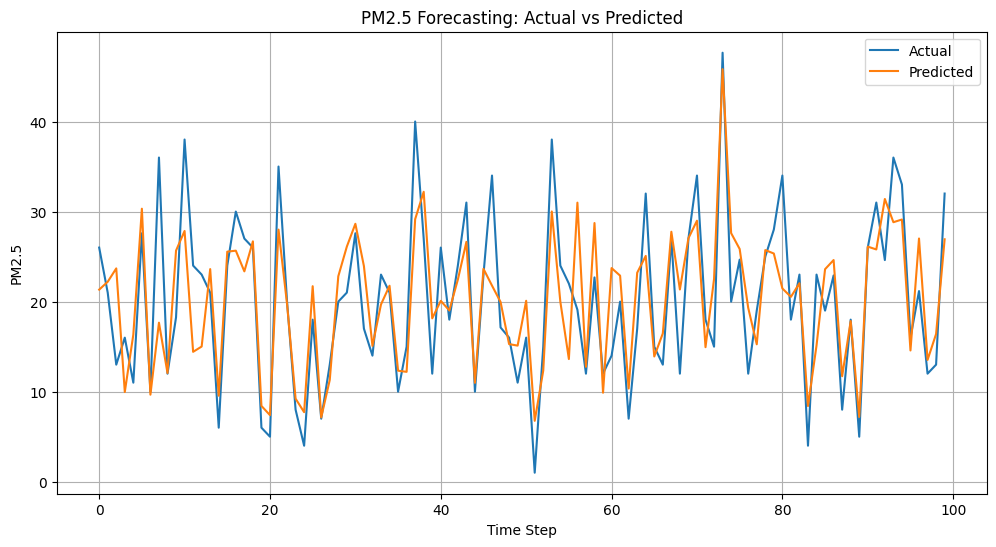

In [47]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test set
test_loss = lstm_model.evaluate(X_test_lstm, y_test_lstm)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Calculate the MSE, RMSE, and R2
mse = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lstm, y_pred_lstm)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Create a separate scaler just for PM2.5 to inverse transform predictions
pm25_scaler = MinMaxScaler()
pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_idx], scaler.scale_[pm25_idx]

# Inverse transform to get actual PM2.5 values
y_test_actual = pm25_scaler.inverse_transform(y_test_lstm)
y_pred_actual = pm25_scaler.inverse_transform(y_pred_lstm)

mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[:100], label='Actual')
plt.plot(y_pred_actual[:100], label='Predicted')
plt.title('PM2.5 Forecasting: Actual vs Predicted')
plt.ylabel('PM2.5')
plt.xlabel('Time Step')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


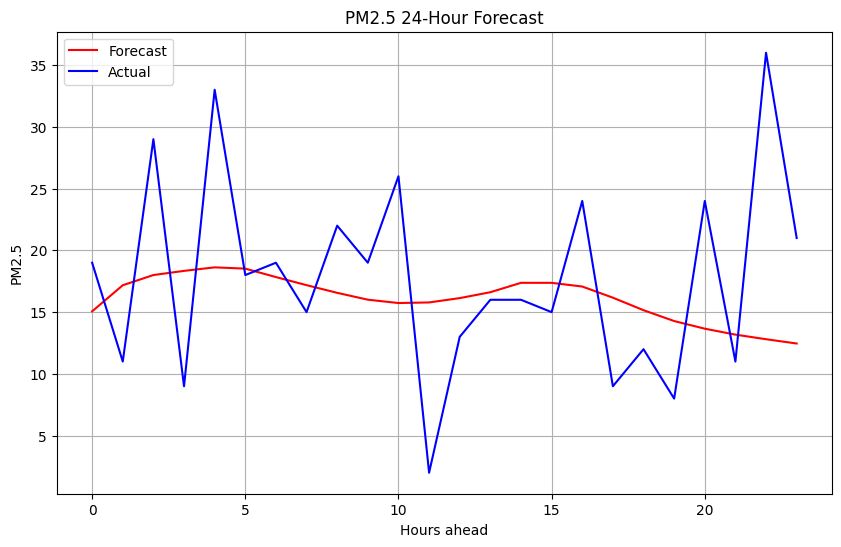

In [57]:
def forecast_multivariate_next_24h(model, last_sequence, scaler, pm25_idx):
    """
    Forecast PM2.5 values for the next 24 hours based on multivariate input
    
    Parameters:
    -----------
    model : Keras model
        Trained LSTM model
    last_sequence : numpy.ndarray
        Last sequence window with shape (1, seq_length, n_features)
    scaler : sklearn.preprocessing.MinMaxScaler
        Scaler used for all features
    pm25_idx : int
        Index of PM2.5 in the feature set
        
    Returns:
    --------
    numpy.ndarray
        Predicted PM2.5 values for next 24 hours
    """
    predictions = []
    current_sequence = last_sequence.copy()
    
    # Create a separate scaler just for PM2.5 to inverse transform predictions
    pm25_scaler = MinMaxScaler()
    pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_idx], scaler.scale_[pm25_idx]
    
    # Forecast next 24 hours one by one
    for _ in range(24):
        # Make prediction for next step
        next_pred = model.predict(current_sequence)
        predictions.append(next_pred[0, 0])
        
        # Create new sequence
        # Copy most recent 23 time steps
        new_sequence = current_sequence[0, 1:, :].copy()
        
        # Create the next time step with predicted PM2.5
        # Note: We're setting only PM2.5 value and keeping other features the same
        # In a real scenario, you might want to use forecasts of other features as well
        next_step = current_sequence[0, -1, :].copy()
        next_step[pm25_idx] = next_pred[0, 0]
        
        # Update sequence
        current_sequence = np.concatenate([new_sequence, next_step.reshape(1, -1)]).reshape(1, seq_length, -1)
    
    # Convert predictions back to original scale
    predictions = np.array(predictions).reshape(-1, 1)
    return pm25_scaler.inverse_transform(predictions)

# Get last sequence of data for prediction
last_sequence = X_test_lstm[0:1]  # Take the first test sequence
next_24h_pred = forecast_multivariate_next_24h(lstm_model, last_sequence, scaler, pm25_idx)

# Get actual values for comparison (if available)
actual_next_24 = None
if len(y_test_lstm) >= 24:
    actual_next_24 = y_test_actual[:24]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(range(24), next_24h_pred, 'r-', label='Forecast')
if actual_next_24 is not None:
    plt.plot(range(24), actual_next_24, 'b-', label='Actual')
plt.title('PM2.5 24-Hour Forecast')
plt.xlabel('Hours ahead')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
def lstm_model_builder(hp):
    model = tf.keras.models.Sequential()
    
    # Tune LSTM units
    lstm_units_1 = hp.Int('lstm_units_1', min_value=32, max_value=128, step=32)
    
    model.add(tf.keras.layers.LSTM(
        units=lstm_units_1,
        return_sequences=True,
        input_shape=(seq_length, n_features),
        recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.0, max_value=0.3, step=0.1)
    ))
    
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Second LSTM layer
    model.add(tf.keras.layers.LSTM(
        units=hp.Int('lstm_units_2', min_value=16, max_value=64, step=16),
        return_sequences=True
    ))
    
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    
    # Conditional third LSTM layer
    if hp.Boolean('use_third_lstm'):
        model.add(tf.keras.layers.LSTM(units=hp.Int('lstm_units_3', min_value=8, max_value=32, step=8)))
        model.add(tf.keras.layers.BatchNormalization())
    
    # Dense layers
    model.add(tf.keras.layers.Dense(
        units=hp.Int('dense_units', min_value=8, max_value=32, step=8),
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(1))
    
    # Compile with optimized learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    
    return model

# Configure the tuner
tuner = kt.Hyperband(
    lstm_model_builder,
    objective='val_loss',
    max_epochs=100,
    factor=3,
    directory='lstm_tuning',
    project_name='pm25_lstm'
)

d:\UNAL\Tercer Semestre\Propuesta de TDG\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
# Search for the best hyperparameters
tuner.search(
    X_train_lstm, y_train_lstm,
    epochs=100,
    validation_data=(X_val_lstm, y_val_lstm),
    callbacks=[early_stopping]
)

Trial 76 Complete [00h 01m 19s]
val_loss: 0.01752505451440811

Best val_loss So Far: 0.009751049801707268
Total elapsed time: 01h 51m 35s

Search: Running Trial #77

Value             |Best Value So Far |Hyperparameter
32                |64                |lstm_units_1
0                 |0.2               |recurrent_dropout
0.4               |0                 |dropout_1
48                |16                |lstm_units_2
0.1               |0.4               |dropout_2
True              |True              |use_third_lstm
16                |16                |dense_units
0.0001            |0.01              |learning_rate
32                |16                |lstm_units_3
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
1437/1437 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - loss: 0.2839 - val_loss: 0.0330
Epoch 2/2
  64/1437 

KeyboardInterrupt: 

In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Build the model with the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)

Best hyperparameters: {'lstm_units_1': 96, 'recurrent_dropout': 0.1, 'dropout_1': 0.30000000000000004, 'lstm_units_2': 48, 'return_sequences': True, 'dropout_2': 0.0, 'use_third_lstm': True, 'dense_units': 24, 'learning_rate': 0.01, 'lstm_units_3': 16, 'tuner/epochs': 4, 'tuner/initial_epoch': 2, 'tuner/bracket': 4, 'tuner/round': 1, 'tuner/trial_id': '0028'}


240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0993
Test Loss: 0.0982636958360672
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Mean Squared Error: 0.0983
Root Mean Squared Error: 0.3135
R² Score: -3.2982
Mean Squared Error: 662.4385
Root Mean Squared Error: 25.7379
R² Score: -3.2982


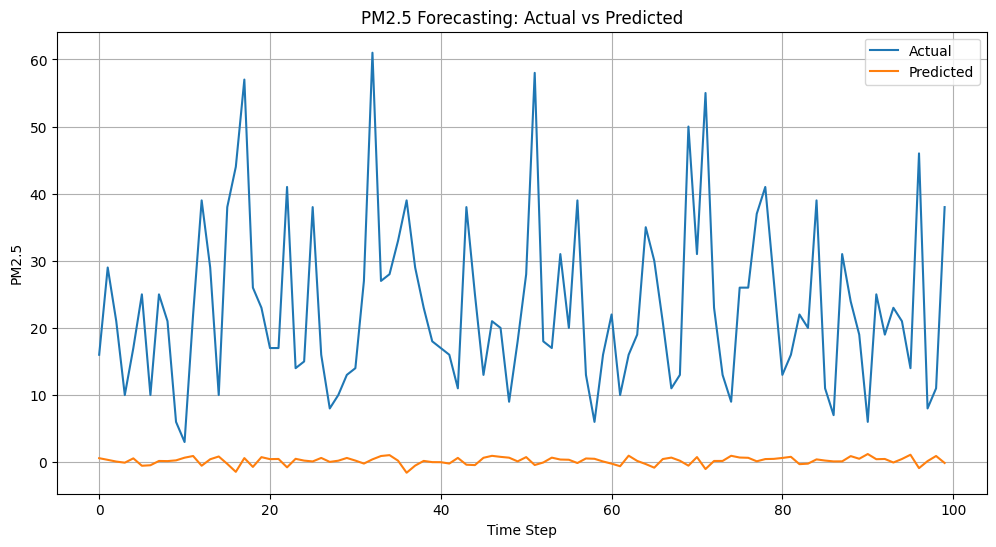

In [ ]:
# Evaluate on test set
test_loss = best_model.evaluate(X_test_lstm, y_test_lstm)
print(f"Test Loss: {test_loss}")

# Make predictions
y_pred_lstm = best_model.predict(X_test_lstm)

# Calculate the MSE, RMSE, and R2
mse = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_lstm, y_pred_lstm)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Create a separate scaler just for PM2.5 to inverse transform predictions
pm25_scaler = MinMaxScaler()
pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_idx], scaler.scale_[pm25_idx]

# Inverse transform to get actual PM2.5 values
y_test_actual = pm25_scaler.inverse_transform(y_test_lstm)
y_pred_actual = pm25_scaler.inverse_transform(y_pred_lstm)

mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual[:100], label='Actual')
plt.plot(y_pred_actual[:100], label='Predicted')
plt.title('PM2.5 Forecasting: Actual vs Predicted')
plt.ylabel('PM2.5')
plt.xlabel('Time Step')
plt.legend()
plt.grid(True)
plt.show()